In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_breast_cancer # Using built-in for simplicity, but structure for local is present



In [3]:

data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Option B: Load data from a local CSV file (Uncomment and adjust for local use)
# FILE_PATH = 'breast_cancer_data.csv' 
# try:
#     df = pd.read_csv(FILE_PATH)
#     # Assuming the target is the last column (or named 'target')
#     X = df.iloc[:, :-1].values
#     y = df.iloc[:, -1].values
#     feature_names = df.columns[:-1].tolist()
# except FileNotFoundError:
#     print(f"Local file '{FILE_PATH}' not found. Using built-in dataset.")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features (Crucial for SVM/Distance-based models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)
acc_linear = accuracy_score(y_test, svm_linear.predict(X_test_scaled))
print(f"Linear Kernel Accuracy: {acc_linear:.4f}")

svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
acc_rbf = accuracy_score(y_test, svm_rbf.predict(X_test_scaled))
print(f"RBF Kernel Accuracy: {acc_rbf:.4f}")




Linear Kernel Accuracy: 0.9766
RBF Kernel Accuracy: 0.9766


In [6]:
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'gamma': [1, 0.1, 0.01, 0.001], 
    'kernel': ['rbf']
}


grid_search = GridSearchCV(SVC(random_state=42), param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train_scaled, y_train)


best_svm = grid_search.best_estimator_
y_pred_tuned = best_svm.predict(X_test_scaled)

print(f"\nBest Parameters Found: {grid_search.best_params_}")
print(f"Tuned Model Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print("\nClassification Report for Tuned Model:")
print(classification_report(y_test, y_pred_tuned))





Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

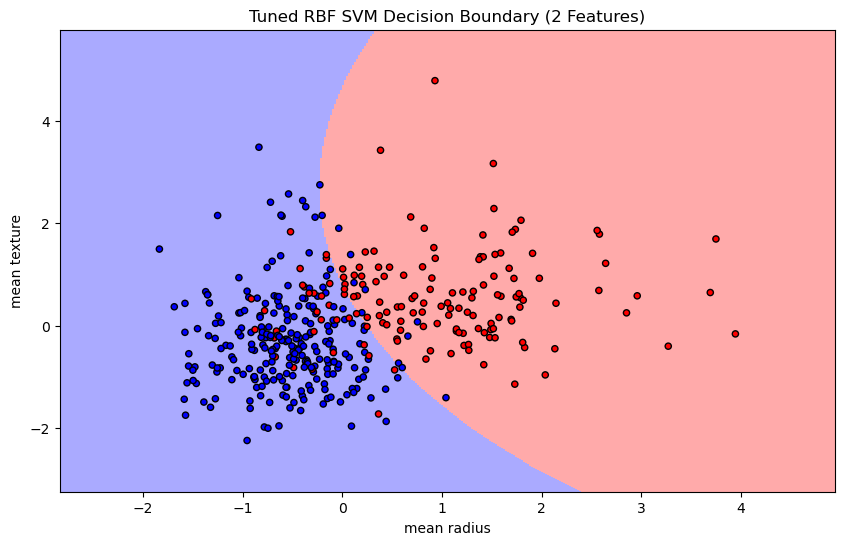

In [7]:
def plot_decision_boundary(X_data, y_data, classifier, title):
    X_plot = X_data[:, :2] 
    
    classifier.fit(X_plot, y_data)
    
    h = .02  
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
    
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_data, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.show()

best_params = grid_search.best_params_
svm_2d = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'], random_state=42)
plot_decision_boundary(X_train_scaled, y_train, svm_2d, "Tuned RBF SVM Decision Boundary (2 Features)")
